In [244]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [245]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [246]:
#  1. Get the total rides for each city type
total_rides_per_city_type=pyber_data_df.groupby(["type"]).count()["ride_id"]

In [247]:
# 2. Get the total drivers for each city type
total_drivers_per_city_type=city_data_df.groupby(["type"]).sum()["driver_count"]

In [248]:
#  3. Get the total amount of fares for each city type
total_fares_per_city_type=pyber_data_df.groupby(["type"]).sum()["fare"]

In [249]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_percitytype=pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.groupby(["type"]).count()["ride_id"]

In [250]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver_percitytype=pyber_data_df.groupby(["type"]).sum()["fare"]/total_drivers_per_city_type

In [251]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary={"Total Rides":total_rides_per_city_type,
              "Total Drivers":total_drivers_per_city_type,
              "Total Fares":total_fares_per_city_type,
               "Average Fare per Ride":avg_fare_per_ride_percitytype,
               "Average Fare per Driver":avg_fare_per_driver_percitytype}
pyber_summary_df=pd.DataFrame(pyber_summary)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [252]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [253]:
#  8. Format the columns.
pyber_summary={"Total Rides":total_rides_per_city_type.map("{:,}".format),
              "Total Drivers":total_drivers_per_city_type.map("{:,}".format),
              "Total Fares":total_fares_per_city_type.map("${:,.2f}".format),
               "Average Fare per Ride":avg_fare_per_ride_percitytype.map("${:,.2f}".format),
               "Average Fare per Driver":avg_fare_per_driver_percitytype.map("${:,.2f}".format)}
pyber_summary_df=pd.DataFrame(pyber_summary)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [254]:
######################################################################################################################

In [255]:
#Deliverable 2. Create a multiple line plot that shows the total weekly of the fares for each type of city.¶

In [256]:
# 1. Read the merged DataFrame
new_dataframe_df=pyber_data_df.groupby(["type","date"]).sum()["fare"]

In [257]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
new_dataframe_df=new_dataframe_df.reset_index()

In [258]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_pivoted_dataframe_df=new_dataframe_df.pivot(index="date",columns="type",values="fare")
new_pivoted_dataframe_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [259]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_pivoted_dataframe_df.loc['2019-01-01':'2019-04-28']

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [260]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
new_pivoted_dataframe_df.index=pd.to_datetime(new_pivoted_dataframe_df.index)

In [261]:
# 7. Check that the datatype for the index is datetime using df.info()
new_pivoted_dataframe_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [268]:
new_pivoted_dataframe_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [269]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_df=new_pivoted_dataframe_df.resample("W").sum()
weekly_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


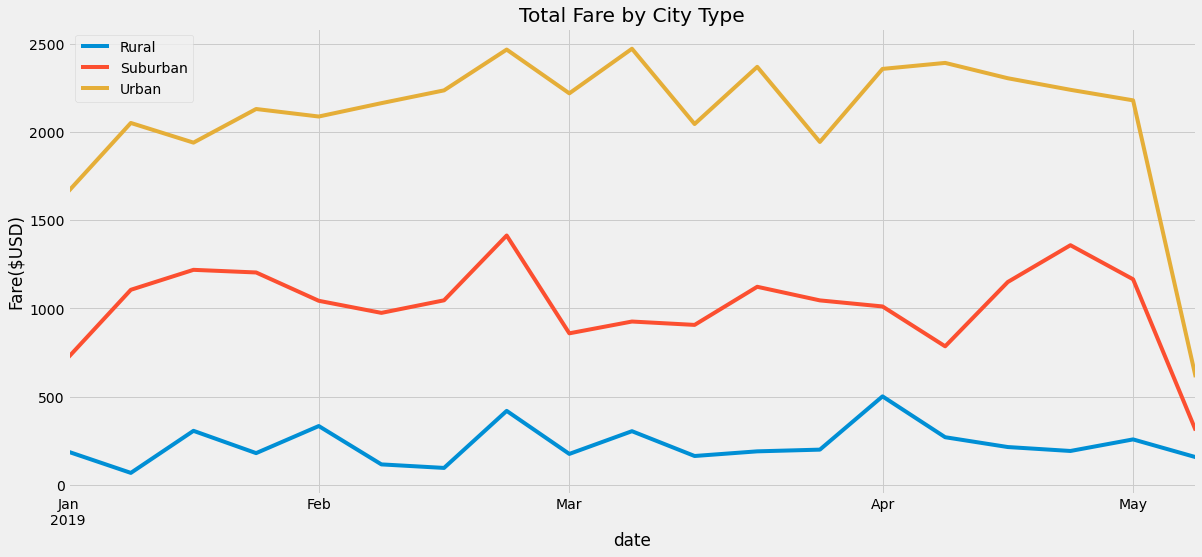

In [289]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
%matplotlib inline
labels=["Rural","Suburban","Urban"]

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax = weekly_df.plot(figsize = (18,8))
ax.set_ylabel("Fare($USD)")
ax.set_title("Total Fare by City Type")
ax.legend()
plt.savefig("Analysis/PyBer_fare_summary.png")
plt.show()